# Hierarchical Clustering

### Clustering of university

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [4]:
university=pd.read_excel(r"D:\datascience\University_Clustering.xlsx")
university

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [5]:
university.describe()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [6]:
university.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [7]:
Univ= university.drop(["State"], axis=1)


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)
df_norm = norm_func(Univ.iloc[:, 1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [10]:
z = linkage(df_norm, method = "complete", metric = "euclidean")
z

array([[11.        , 21.        ,  0.10626637,  2.        ],
       [12.        , 22.        ,  0.13187683,  2.        ],
       [ 8.        , 24.        ,  0.13239629,  2.        ],
       [ 5.        ,  6.        ,  0.15357479,  2.        ],
       [ 4.        , 25.        ,  0.18518411,  3.        ],
       [10.        , 16.        ,  0.19782036,  2.        ],
       [28.        , 30.        ,  0.24629762,  4.        ],
       [ 0.        ,  7.        ,  0.26741814,  2.        ],
       [ 3.        , 29.        ,  0.27803629,  4.        ],
       [14.        , 27.        ,  0.30357016,  3.        ],
       [31.        , 34.        ,  0.34007072,  7.        ],
       [32.        , 33.        ,  0.34110215,  6.        ],
       [13.        , 23.        ,  0.39456348,  2.        ],
       [ 9.        , 19.        ,  0.4942792 ,  2.        ],
       [26.        , 36.        ,  0.50082808,  8.        ],
       [15.        , 17.        ,  0.55679044,  2.        ],
       [18.        , 20.

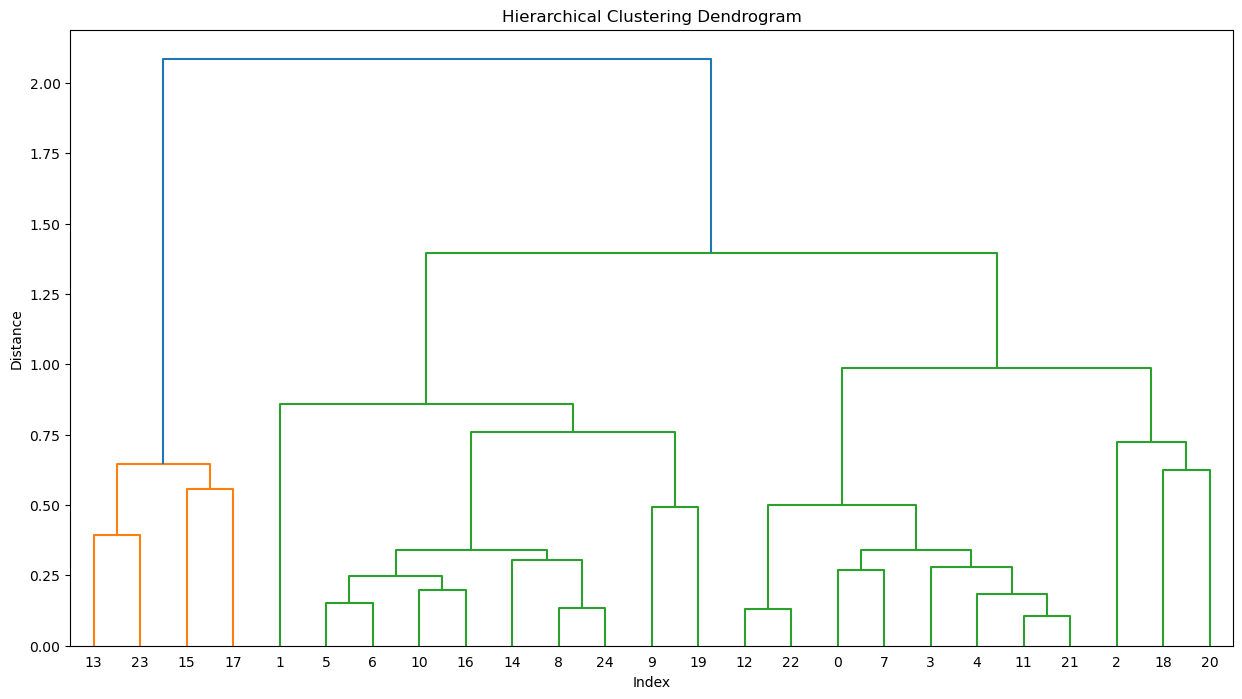

In [11]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()


In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_


C:\Users\reshm\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [14]:

cluster_labels = pd.Series(h_complete.labels_)


In [15]:
Univ['clust'] = cluster_labels
Univ1 = Univ.iloc[:, [7,0,1,2,3,4,5,6]]
Univ1.head()


,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [16]:
# Aggregate mean of each cluster
Univ1.iloc[:, 2:].groupby(Univ1.clust).mean()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000
